This is an ipynb for visualizing the results of results attained through running the bert_testing.bat file(which uses BERT_NER.py) to test performance and efficiency gains of training various layers of the BERT model during the finetuning process. 

It was created in response to often seeing a "you can either train the classifier or the whole model" dichotomy, without regard for a middle ground(and often not a recognition of the significantly worse performance).

In [1]:
from glob import glob
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import dill as pickle
import pandas as pd

In [2]:
files = glob('Results/*')

In [3]:
data_dict = {}
for f in tqdm_notebook(files):
    entries = f.split('\\')[-1].split('_')
    layers = 'trained_layers: {}'.format(int(entries[0][2:]))
    if int(entries[0][2:]) == 0:
        if int(entries[1][-1]) == 1:
            layers = 'classifier'
        else:
            continue
    elif int(entries[0][2:]) == 11:
        layers = 'Full'
    with open(f, 'rb') as f:
        data_dict[layers] = pickle.load(f)

c:\users\johnc\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


# Loss and Training Time by Trainable Layers

The plots below show decreasing returns to more and more trainable layers and a roughly linearly increase in training time(all models were trained on a GeForce GTX 1070 w/ ~8.5GB). This suggests one should (at least in the NER case(which is a case of highly unbalanced classes)) try to train as many layers as possible. This is quite intuitive but is at least somewhat in contrast to how such questions are treated in example code which often provide the option to train all layers or just train the last layer. For the most part most blog posts/examples do not seem to stress the importance of training more than just the classifier, even if it is just a few extra layers. This importance could also be looked over if just evaulating on the basis of accuracy for imbalanced tasks, as the majority of finetuning tasks are.

The classifier is trained with a higher learning rate(3e-3) than the other runs(3e-5), it is likely that the optimal training rate for the runs with a small number of trained layers is actually somewhere between those two values.

It would be interesting to test how well a BERT model could perform while being iterated through the different fine-tuning tasks with different classifiers but with a certain number of trainable layers during each task as well.

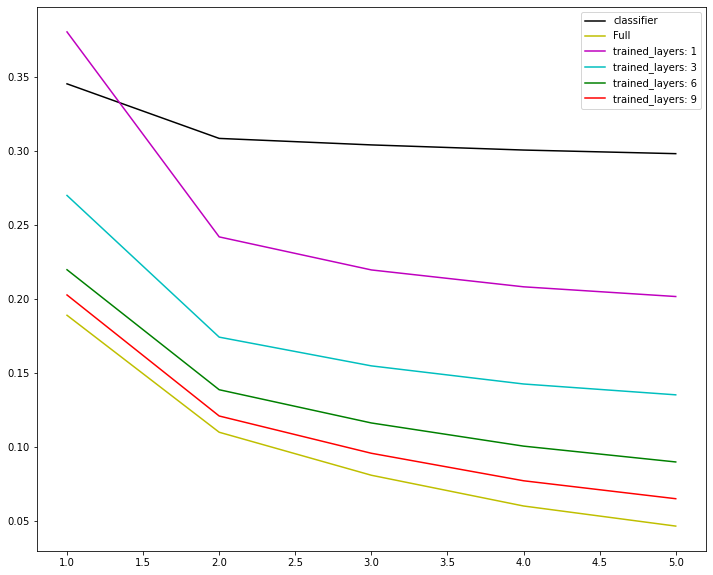

In [4]:
# Training loss
colors = list("rgcmyk")
plot_key = 'train_loss'
clses = []
plt.figure(figsize = (12,10))
for cls in data_dict.keys():
    clses.append(cls)
    y = data_dict[cls][plot_key]
    x = range(1,len(y)+1)
    plt.plot(x,y, color = colors.pop())
plt.legend(clses)
plt.show()

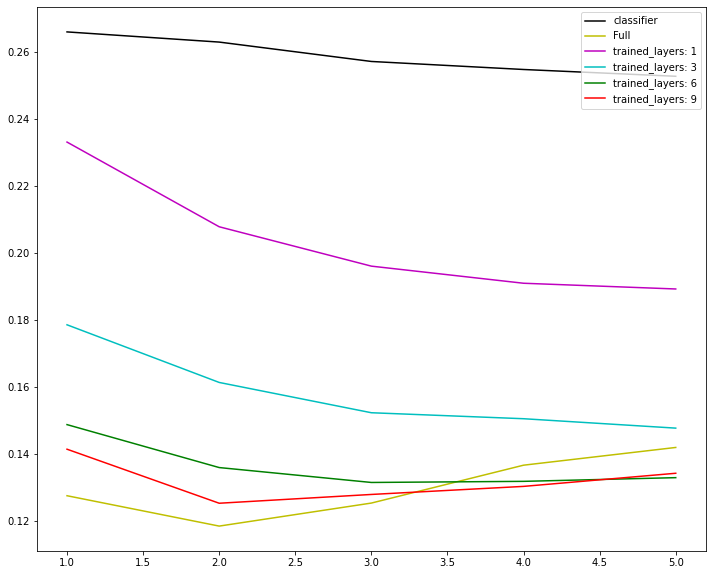

In [5]:
# Evaluation loss
colors = list("rgcmyk")
plot_key = 'eval_loss'
clses = []
plt.figure(figsize = (12,10))
for cls in data_dict.keys():
    clses.append(cls)
    y = data_dict[cls][plot_key]
    x = range(1,len(y)+1)
    plt.plot(x,y, color = colors.pop())
plt.legend(clses)
plt.show()

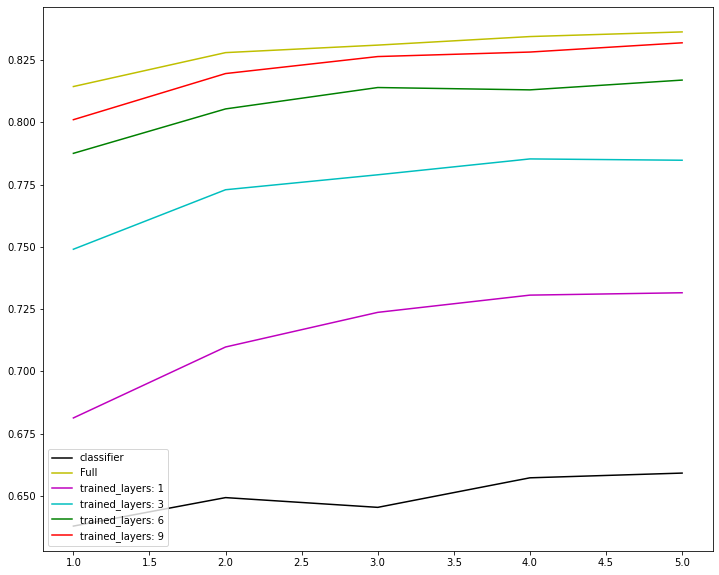

In [6]:
# Evaluation f1-score
colors = list("rgcmyk")
plot_key = 'f1_score'
clses = []
plt.figure(figsize = (12,10))
for cls in data_dict.keys():
    clses.append(cls)
    y = data_dict[cls][plot_key]
    x = range(1,len(y)+1)
    plt.plot(x,y, color = colors.pop())
plt.legend(clses)
plt.show()

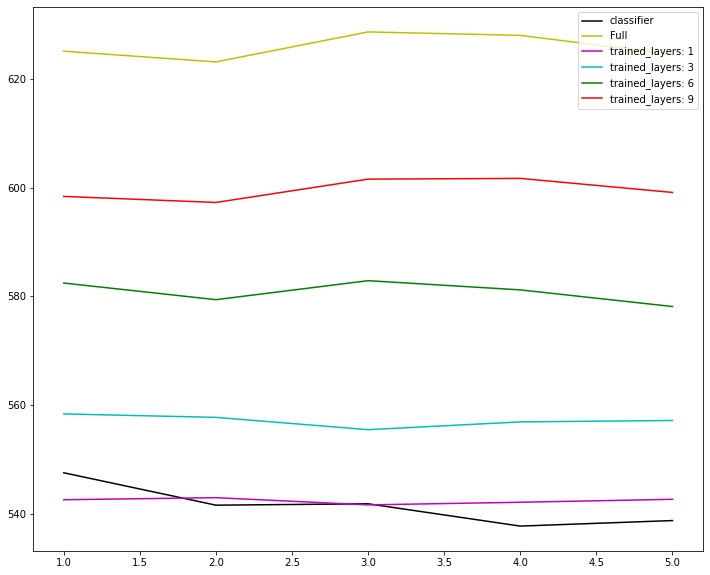

In [7]:
# training time
colors = list("rgcmyk")
plot_key = 'time'
clses = []
plt.figure(figsize = (12,10))
for cls in data_dict.keys():
    clses.append(cls)
    y = data_dict[cls][plot_key]
    x = range(1,len(y)+1)
    plt.plot(x,y, color = colors.pop())
plt.legend(clses)
plt.show()

# Parameter Drift

If we look below at the base parameter drift for purely the classifier we see much greater parameter drift for just the classifier training than the others. Granted this is oftly crude and highly dependent on intialization and learning rate, but possibly it suggests that too much is being required of the classifier when it is being used as the sole trainable parameter.

In [27]:
df_dict = {'run':[],
          'parameter':[],
          'drift': []}
for k, d in data_dict.items():
    for k1,v1 in d['base_parameter_drift'][-1].items():
        if k1 != 'classifier.weight':
            continue
        df_dict['run'].append(k)
        df_dict['parameter'].append(k1)
        df_dict['drift'].append(v1)

In [28]:
df = pd.DataFrame(df_dict)

In [31]:
df

,run,parameter,drift
0,classifier,classifier.weight,0.021640
1,Full,classifier.weight,0.000027
2,trained_layers: 1,classifier.weight,0.000074
3,trained_layers: 3,classifier.weight,0.000043
4,trained_layers: 6,classifier.weight,0.000033
5,trained_layers: 9,classifier.weight,0.000029
